In [203]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Import Scaled Data

In [204]:
# Import scaled earthquake data
df = pd.read_csv('Resources/earthquake_data_standardized.csv')
df.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,1


## Create X and y

In [205]:
# Create X and y
X = df.drop(columns='mmi_class', axis=1)
y = df['mmi_class']
display(X.head())
display(y[:5])

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,-0.059860,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,-0.066207,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.062811,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.062760,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.062428,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550


0    2
1    0
2    0
3    0
4    1
Name: mmi_class, dtype: int64

## Random Forest Classifier Model without Optimization
We want to confirm that we still get results consistent with what we received with the preliminary Random Forest Classifier model after preprocessing the data. 

In [206]:
# Split data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [207]:
# Instantiate and fit a Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on test data
y_predict = rfc.predict(X_test)

# Calculate balanced accuracy and classification report
print(f'Balanced Accuracy - Test: {balanced_accuracy_score(y_test, y_predict):.3f}')
print(classification_report(y_test, y_predict))

Balanced Accuracy - Test: 0.670
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        79
           1       0.64      0.62      0.63        96
           2       0.66      0.60      0.63        65

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.67      0.67      0.67       240



Results are consistent. Therefore, we will proceed with optimization.

## Evaluate Random Forest Classifier Model Using Reduced Feature Sets

### Reduce Number of features Using P-Value Analysis

Calculate the p-value of each feature

In [208]:
# Instantiate and fit a linear regression model for p-value analysis
lr = sm.OLS(y_train, X_train).fit()

# Show the p-values of all columns sorted in ascending order
lr.pvalues.sort_values()

magnitude                2.940583e-14
depth                    2.950929e-05
latitude                 3.902854e-02
nodal_plane_1_strike     1.867985e-01
n_axis_plunge            2.877141e-01
p_axis_plunge            2.962457e-01
p_axis_azimuth           3.189017e-01
percent_double_couple    3.242398e-01
min_station_distance     3.548340e-01
t_axis_plunge            4.073361e-01
t_axis_azimuth           5.684785e-01
scalar_moment            5.948902e-01
nodal_plane_2_rake       6.887864e-01
longitude                6.974735e-01
t_axis_length            7.170648e-01
tensor_mrp               7.391430e-01
nodal_plane_1_dip        7.565821e-01
tensor_mrt               7.915779e-01
n_axis_length            7.993130e-01
nodal_plane_2_dip        8.216634e-01
tensor_mpp               8.331485e-01
tensor_mtt               8.331754e-01
tensor_mrr               8.331938e-01
nodal_plane_2_strike     8.359251e-01
n_axis_azimuth           8.385503e-01
nodal_plane_1_rake       8.412486e-01
number_stati

Remove each feature one by one by setting the cutoff value for p to the p-value of each feature.

In [209]:

# Create a list of p-value cutoffs that are equal to the p-values of each feature
cutoffs = lr.pvalues[lr.pvalues > min(lr.pvalues)].sort_values(ascending=False).to_list()
# Create a dictionary to store the results of the feature removal
pvalues_optimization = {'Number of Features Removed': range(1, len(cutoffs)+1),
                        'Cutoffs': cutoffs,
                        'Train Accuracy': [],
                        'Test Accuracy': []}

for cutoff in cutoffs:
    # Remove features from train and test data
    X_train_reduced = X_train[lr.pvalues[lr.pvalues < cutoff].keys()]
    X_test_reduced = X_test[lr.pvalues[lr.pvalues < cutoff].keys()]

    # Instantiate and fit a Random Forest Classifier model
    rfc = RandomForestClassifier(random_state=3)
    rfc.fit(X_train_reduced, y_train)

    # Make predictions for train and test data
    y_train_predict = rfc.predict(X_train_reduced)
    y_test_predict = rfc.predict(X_test_reduced)

    # Record the accuracy for train and test data
    pvalues_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, y_train_predict))
    pvalues_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, y_test_predict))

# Create a DataFrame for the results
df_pvalues_optimization = pd.DataFrame(pvalues_optimization).set_index('Number of Features Removed')

display(df_pvalues_optimization)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
1,0.898488,1.000000,0.636442
2,0.889745,1.000000,0.662829
3,0.867019,1.000000,0.647446
4,0.841249,1.000000,0.646859
5,0.838550,1.000000,0.677949
6,0.835925,1.000000,0.653643
7,0.833194,1.000000,0.647021
8,0.833175,1.000000,0.667210
9,0.833149,1.000000,0.643548


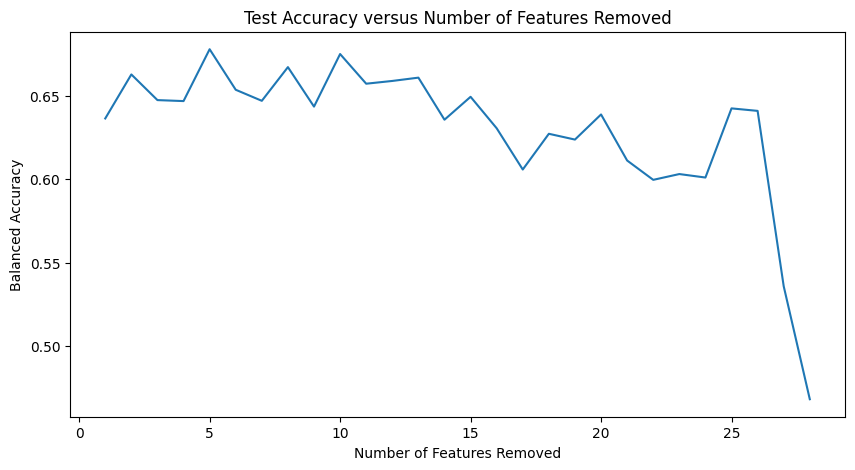

In [210]:
# Plot the Test Accuracy versus the number of features removed
plt.figure(figsize = (10,5))
plt.plot(df_pvalues_optimization.index,
         df_pvalues_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Features Removed')
plt.xlabel('Number of Features Removed')
plt.ylabel('Balanced Accuracy')

plt.show()

In [211]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pvalues_optimization['Test Accuracy'])
max_accuracy_record = df_pvalues_optimization[df_pvalues_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
5,0.83855,1.0,0.677949


**Conclusion:** No improvement on overfitting and balanced accuracy on test data has improved only marginally.

### Reduce Number of Features Using PCA

In [212]:
# Optimize the number of principal components to use
# Define a list used to vary the number of principal components to try from 2 to the number of
# features minus 1.
n_principal_components = range(2, len(X.columns))

pca_optimization = {'Components': n_principal_components,
                    'Explained Variance': [],
                    'Train Accuracy': [],
                    'Test Accuracy': []}

# Loop over the number of principal components to try
for n_comps in n_principal_components:
    # Instantiate a PCA model
    pca = PCA(n_components=n_comps, random_state=1)

    # Fit the PCA model to the train data
    pca.fit(X_train)

    # Transform train and test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Record the explained variance
    pca_optimization['Explained Variance'].append(pca.explained_variance_ratio_.sum())

    # Instantiate and fit a Random Forest Classifier model with the PCA feature set
    rfc_pca = RandomForestClassifier(random_state=7)
    rfc_pca.fit(X_train_pca, y_train)

    # Predict the train data and record the Balanced Accuracy Score
    y_train_pca_predict = rfc_pca.predict(X_train_pca)
    pca_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, y_train_pca_predict))

    # Predict the test data and record the Balanced Accuracy Score
    y_test_pca_predict = rfc_pca.predict(X_test_pca)
    pca_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, y_test_pca_predict))

# Create a DataFrame
df_pca_optimization = pd.DataFrame(pca_optimization).set_index('Components')

display(df_pca_optimization)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
2,0.332566,1.000000,0.454246
3,0.419722,0.998217,0.524218
4,0.493553,1.000000,0.558722
5,0.559587,1.000000,0.557124
6,0.613601,1.000000,0.537947
7,0.663307,1.000000,0.537625
8,0.703863,1.000000,0.555733
9,0.737785,1.000000,0.575659
10,0.770749,1.000000,0.556055


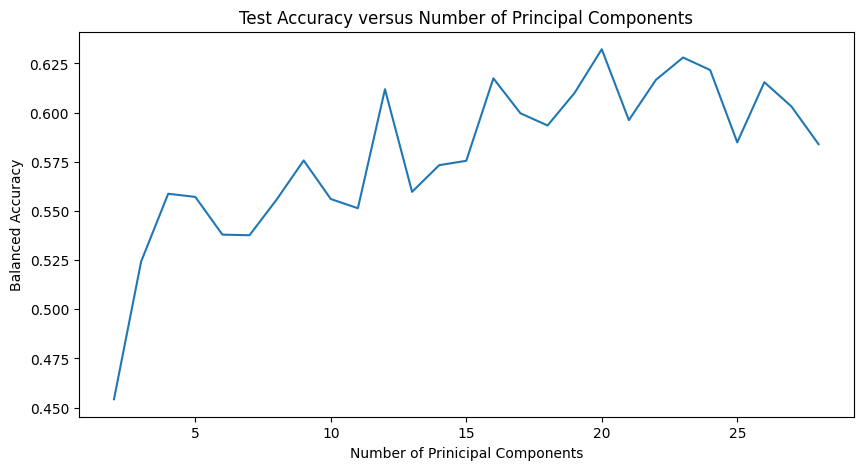

In [213]:
# Plot Accuracy versus number of principal components
plt.figure(figsize = (10,5))
plt.plot(df_pca_optimization.index,
         df_pca_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Principal Components')
plt.xlabel('Number of Prinicipal Components')
plt.ylabel('Balanced Accuracy')

plt.show()

In [214]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pca_optimization['Test Accuracy'])
max_accuracy_record = df_pca_optimization[df_pca_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
20,0.986776,1.0,0.632226


**Conclusion:** No improvement on overfitting and balanced accuracy on test data is slightly worse than without removing any features using PCA.

## Using Hyperparameter Tuning to Improve Performance 

In [215]:
# Try different values for 'max_depth' of Random Forest Classifier model
depths = range(1, 40, 2)

rfc_scores = {'Depth': [],
              'Train Accuracy': [],
              'Test Accuracy': []}

for depth in depths:
    rfc = RandomForestClassifier(max_depth=depth, random_state=7)
    rfc.fit(X_train, y_train)

    y_train_predict = rfc.predict(X_train)
    y_test_predict = rfc.predict(X_test)

    train_accuracy = balanced_accuracy_score(y_train, y_train_predict)
    test_accuracy = balanced_accuracy_score(y_test, y_test_predict)

    rfc_scores['Depth'].append(depth)
    rfc_scores['Train Accuracy'].append(train_accuracy)
    rfc_scores['Test Accuracy'].append(test_accuracy)

df_rfc_scores = pd.DataFrame(rfc_scores).set_index('Depth')

df_rfc_scores.head()

,Train Accuracy,Test Accuracy
Depth,,
1,0.504125,0.483927
3,0.620224,0.627255
5,0.778879,0.662403
7,0.897211,0.675062
9,0.975182,0.694079


<Axes: xlabel='Depth'>

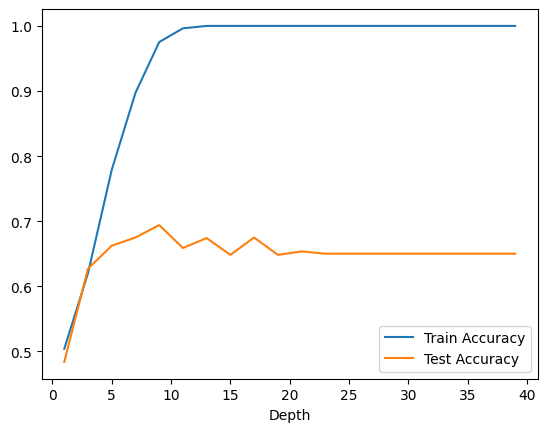

In [216]:
# Plot the scores
df_rfc_scores.plot()

This looks somewhat more promising. Let's vary other hyperparameters as well.

### Vary Multiple Hyperparameters 

We will vary the following hyperparameters.
* n_estimators,
* max_features,
* max_depth,
* min_samples_split,
* min_samples_leaf,
* bootstrap.

Use a randomized search estimator to explore the hyperparameter space.

In [217]:
# Define a hyperparameter grid
param_grid = {'n_estimators': range(100, 1000, 10),
              'max_features': ['sqrt', 'log2'],
              'max_depth': range(1, 40, 2),
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Instantiate a Random Forest Classifier model
rfc = RandomForestClassifier(random_state=0)

In [218]:
# Instantiate the Randomized Search Estimator
random_rfc = RandomizedSearchCV(rfc, param_grid, random_state=0, verbose=3)

# Fit the Randomized Search Estimator on train data
random_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=580;, score=0.583 total time=   1.3s
[CV 2/5] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=580;, score=0.569 total time=   1.1s
[CV 3/5] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=580;, score=0.608 total time=   1.2s
[CV 4/5] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=580;, score=0.587 total time=   1.7s
[CV 5/5] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=580;, score=0.552 total time=   1.4s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=170;, score=0.479 total time=   0.1s
[CV 2/5] END boo

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(1, 40, 2),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': range(100, 1000, 10)},
                   random_state=0, verbose=3)

In [219]:
# Print best hyperparameters
print(random_rfc.best_params_)

{'n_estimators': 830, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 39, 'bootstrap': False}


In [220]:
# Make predictions with the hypertuned model
random_rfc_train_predict = random_rfc.predict(X_train)
random_rfc_test_predict = random_rfc.predict(X_test)

# Calculate and print the balanced accuracies
print(f"Accuracy - Train: {balanced_accuracy_score(y_train, random_rfc_train_predict):.3f}")
print(f"Accuracy - Test: {balanced_accuracy_score(y_test, random_rfc_test_predict):.3f}")

# Calculate the classification report
print(classification_report(y_test, random_rfc_test_predict))

Accuracy - Train: 0.998
Accuracy - Test: 0.670
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        79
           1       0.64      0.61      0.63        96
           2       0.62      0.58      0.60        65

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.67      0.67      0.67       240



** Conclusion: ** We are still overfitting without an improvement in the test accuracy.

Let's explore the hyperparameter space around the optimal parameters

In [221]:
# Define a new hyperparameter grid around the best hyperparameters from before
param_grid = {'n_estimators': range(825, 835),
              'max_features': ['log2'],
              'max_depth': range(37, 42),
              'min_samples_split': [4],
              'min_samples_leaf': [4],
              'bootstrap': [True]}

# Instantiate a Random Forest Classifier model
rfc2 = RandomForestClassifier(random_state=0)

In [222]:
# Use a grid search this time.random_rfc2.random_rfc2
# Instantiate the Grid Search Estimator
grid_rfc2 = GridSearchCV(rfc2, param_grid, verbose=3)

# Fit the Randomized Search Estimator on train data
grid_rfc2.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END bootstrap=True, max_depth=37, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=825;, score=0.590 total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=37, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=825;, score=0.590 total time=   1.7s
[CV 3/5] END bootstrap=True, max_depth=37, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=825;, score=0.608 total time=   2.0s
[CV 4/5] END bootstrap=True, max_depth=37, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=825;, score=0.601 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=37, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=825;, score=0.580 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=37, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=826;, score=0.590 total time=   2.1s
[CV 2/5] END bootstr

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': range(37, 42),
                         'max_features': ['log2'], 'min_samples_leaf': [4],
                         'min_samples_split': [4],
                         'n_estimators': range(825, 835)},
             verbose=3)

In [223]:
# Print best hyperparameters
print(grid_rfc2.best_params_)

{'bootstrap': True, 'max_depth': 37, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 826}


In [224]:
# Make predictions with the hypertuned model
grid_rfc2_train_predict = grid_rfc2.predict(X_train)
grid_rfc2_test_predict = grid_rfc2.predict(X_test)

# Calculate and print the balanced accuracies
print(f"Accuracy - Train: {balanced_accuracy_score(y_train, grid_rfc2_train_predict):.3f}")
print(f"Accuracy - Test: {balanced_accuracy_score(y_test, grid_rfc2_test_predict):.3f}")

# Calculate the classification report
print(classification_report(y_test, grid_rfc2_test_predict))

Accuracy - Train: 0.942
Accuracy - Test: 0.651
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        79
           1       0.63      0.59      0.61        96
           2       0.63      0.52      0.57        65

    accuracy                           0.65       240
   macro avg       0.65      0.65      0.65       240
weighted avg       0.65      0.65      0.65       240



**Conclusion:** This is the best result so far because we were able to reduce the overfitting without scarificing too much accuracy on the test data.  
However, the gap between train and test accuracy is still too large indicating overfitting is still present.

## Prepare Data with Reduced Features
We will now try to use a model build on data that does not contain all of the features. We found above that we achieved the best test accuracy score for a model that did not contain the features with the five largest p-values.  
Therefore, we will remove those five features from that data set and export the data with reduced number of features to a `.csv` file.  
In a seperate Jupyter motebook, we will build a model with the reduced feature set and optimize the hyperparameters.

In [225]:
# Drop the 5 features with the largest p-values
df_red = df.drop(columns=['n_axis_azimuth',
                        'nodal_plane_1_rake',
                        'number_stations',
                        'p_axis_length',
                        'tensor_mtp'])

display(df_red.head())

,longitude,latitude,depth,magnitude,min_station_distance,nodal_plane_1_dip,nodal_plane_1_strike,nodal_plane_2_dip,nodal_plane_2_rake,nodal_plane_2_strike,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtt,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.621166,0.764993,-0.187953,-3.275980,1.009308,1.075972,...,-0.059860,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,0.055255,2
1,-1.586411,1.453026,2.957343,0.278647,0.182939,-0.322804,-0.143028,0.718901,-0.131508,-1.479373,...,-0.066207,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,0.059791,0
2,-0.451425,1.705352,1.297980,0.866900,2.000126,-0.866703,-0.187953,-1.531736,-0.587834,1.217936,...,-0.062811,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,0.061360,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.566141,-0.594754,0.620696,0.775167,-1.224790,1.132758,...,-0.062760,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,0.058169,0
4,0.049063,0.917870,-0.567035,0.866900,1.537912,-0.594754,1.564120,0.775167,-0.179042,0.309369,...,-0.062428,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,0.058550,1


In [226]:
# Export DataFrame with reduced data to a .csv file
df_red.to_csv('Resources/earthquake_data_reduced.csv', index=False)